<a href="https://colab.research.google.com/github/imanuelot/Machine_Learning/blob/main/Orange_Quality_Prediction_OS_Boosting_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Orange Quality Prediction**

## **1. Collecting Data**

The dataset used in this research is sourced from Kaggle at the following link: https://www.kaggle.com/datasets/shruthiiiee/orange-quality?resource=download. From this dataset, we analysed and built a prediction model to predict the orange quality.

In [ ]:
import pandas as pd

In [ ]:
# Load data into data frame
dataset = pd.read_csv('Orange Quality Data.csv')

In [ ]:
# Display data
dataset

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [ ]:
# Display an information of the dataset file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [ ]:
# Display a description of the dataset file
dataset.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


## **2. Data Cleaning**

In this activity, you must be able to check the data you use for missing values, noisy data, or other inappropriate data.

### **2.1. Checking for Missing Value**

In [ ]:
dataset.isnull().sum()

,0
Size (cm),0
Weight (g),0
Brix (Sweetness),0
pH (Acidity),0
Softness (1-5),0
HarvestTime (days),0
Ripeness (1-5),0
Color,0
Variety,0
Blemishes (Y/N),0


Based on the existing checks, **there are no missing values**.

### **2.2. Checking for Duplicate Value**

In [ ]:
# Displaying duplicate data
duplicate_rows = dataset.duplicated()
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)


Based on the existing checks, **there are no duplicate values**.

## **3. Encoding**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


Based on the existing information, it can be seen that there are several attributes/features that are still data object types, **so it is necessary to adjust the encoding for each attribute/feature**.

 We will use `value_counts()` to check unique categories in  features Color, Variety, & Blemishes (Y/N)

In [ ]:
category_counts = dataset['Color'].value_counts()
category_counts

,count
Color,
Deep Orange,75
Light Orange,64
Orange-Red,55
Orange,38
Yellow-Orange,9


In [ ]:
category_counts = dataset['Variety'].value_counts()
category_counts

,count
Variety,
Cara Cara,21
Temple,18
Star Ruby,18
Navel,16
Moro (Blood),16
Tangerine,14
Clementine,14
Washington Navel,14
Satsuma Mandarin,13


In [ ]:
category_counts = dataset['Blemishes (Y/N)'].value_counts()
category_counts

,count
Blemishes (Y/N),
N,149
Y (Sunburn Patch),23
Y (Scars),17
Y (Minor),14
Y (Mold Spot),10
Y (Bruising),9
Y (Split Skin),8
Y (Minor Insect Damage),6
Y (Sunburn),2


In [ ]:
# Label Encode the features Color, Variety, & Blemishes (Y/N)
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_encoded = dataset

# Columns we want to encode
columns_to_encode = ['Color','Variety' ,'Blemishes (Y/N)']

# Applying label encoding to each column in the list
for column in columns_to_encode:
    data_encoded[column] = LabelEncoder().fit_transform(data_encoded[column])

# Print the dataset to check the changes
data_encoded

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,3.0


## **4. Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

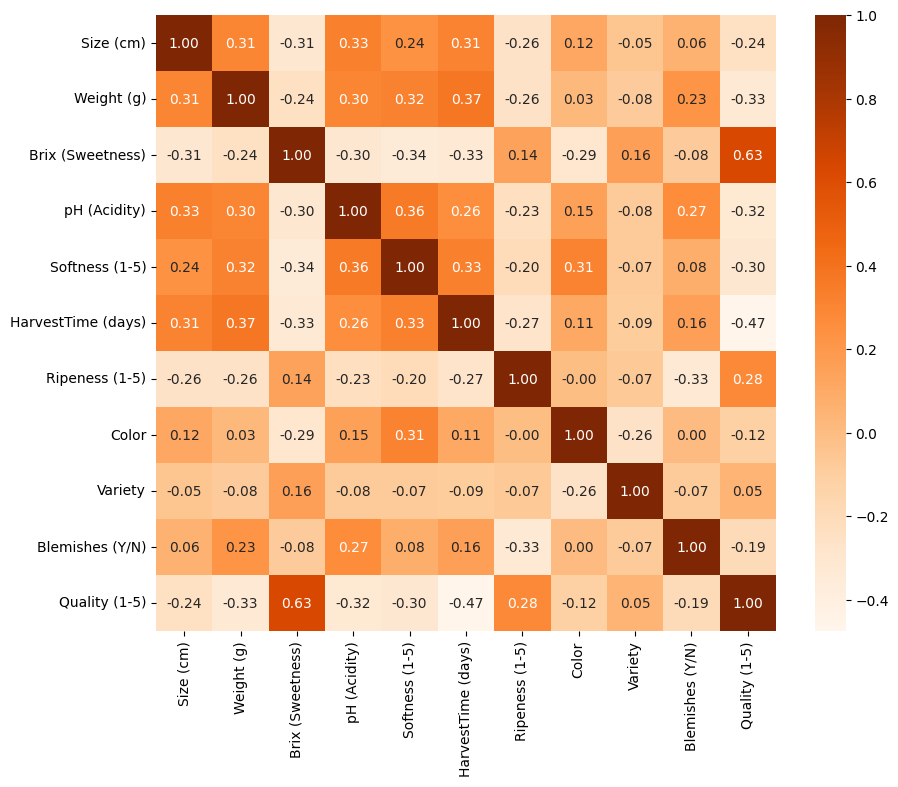

In [ ]:
# Checking the co-relation among features using heatmap
corr_matrix = data_encoded.corr()

# Plot correlation on heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Oranges', cbar=True)
plt.show()

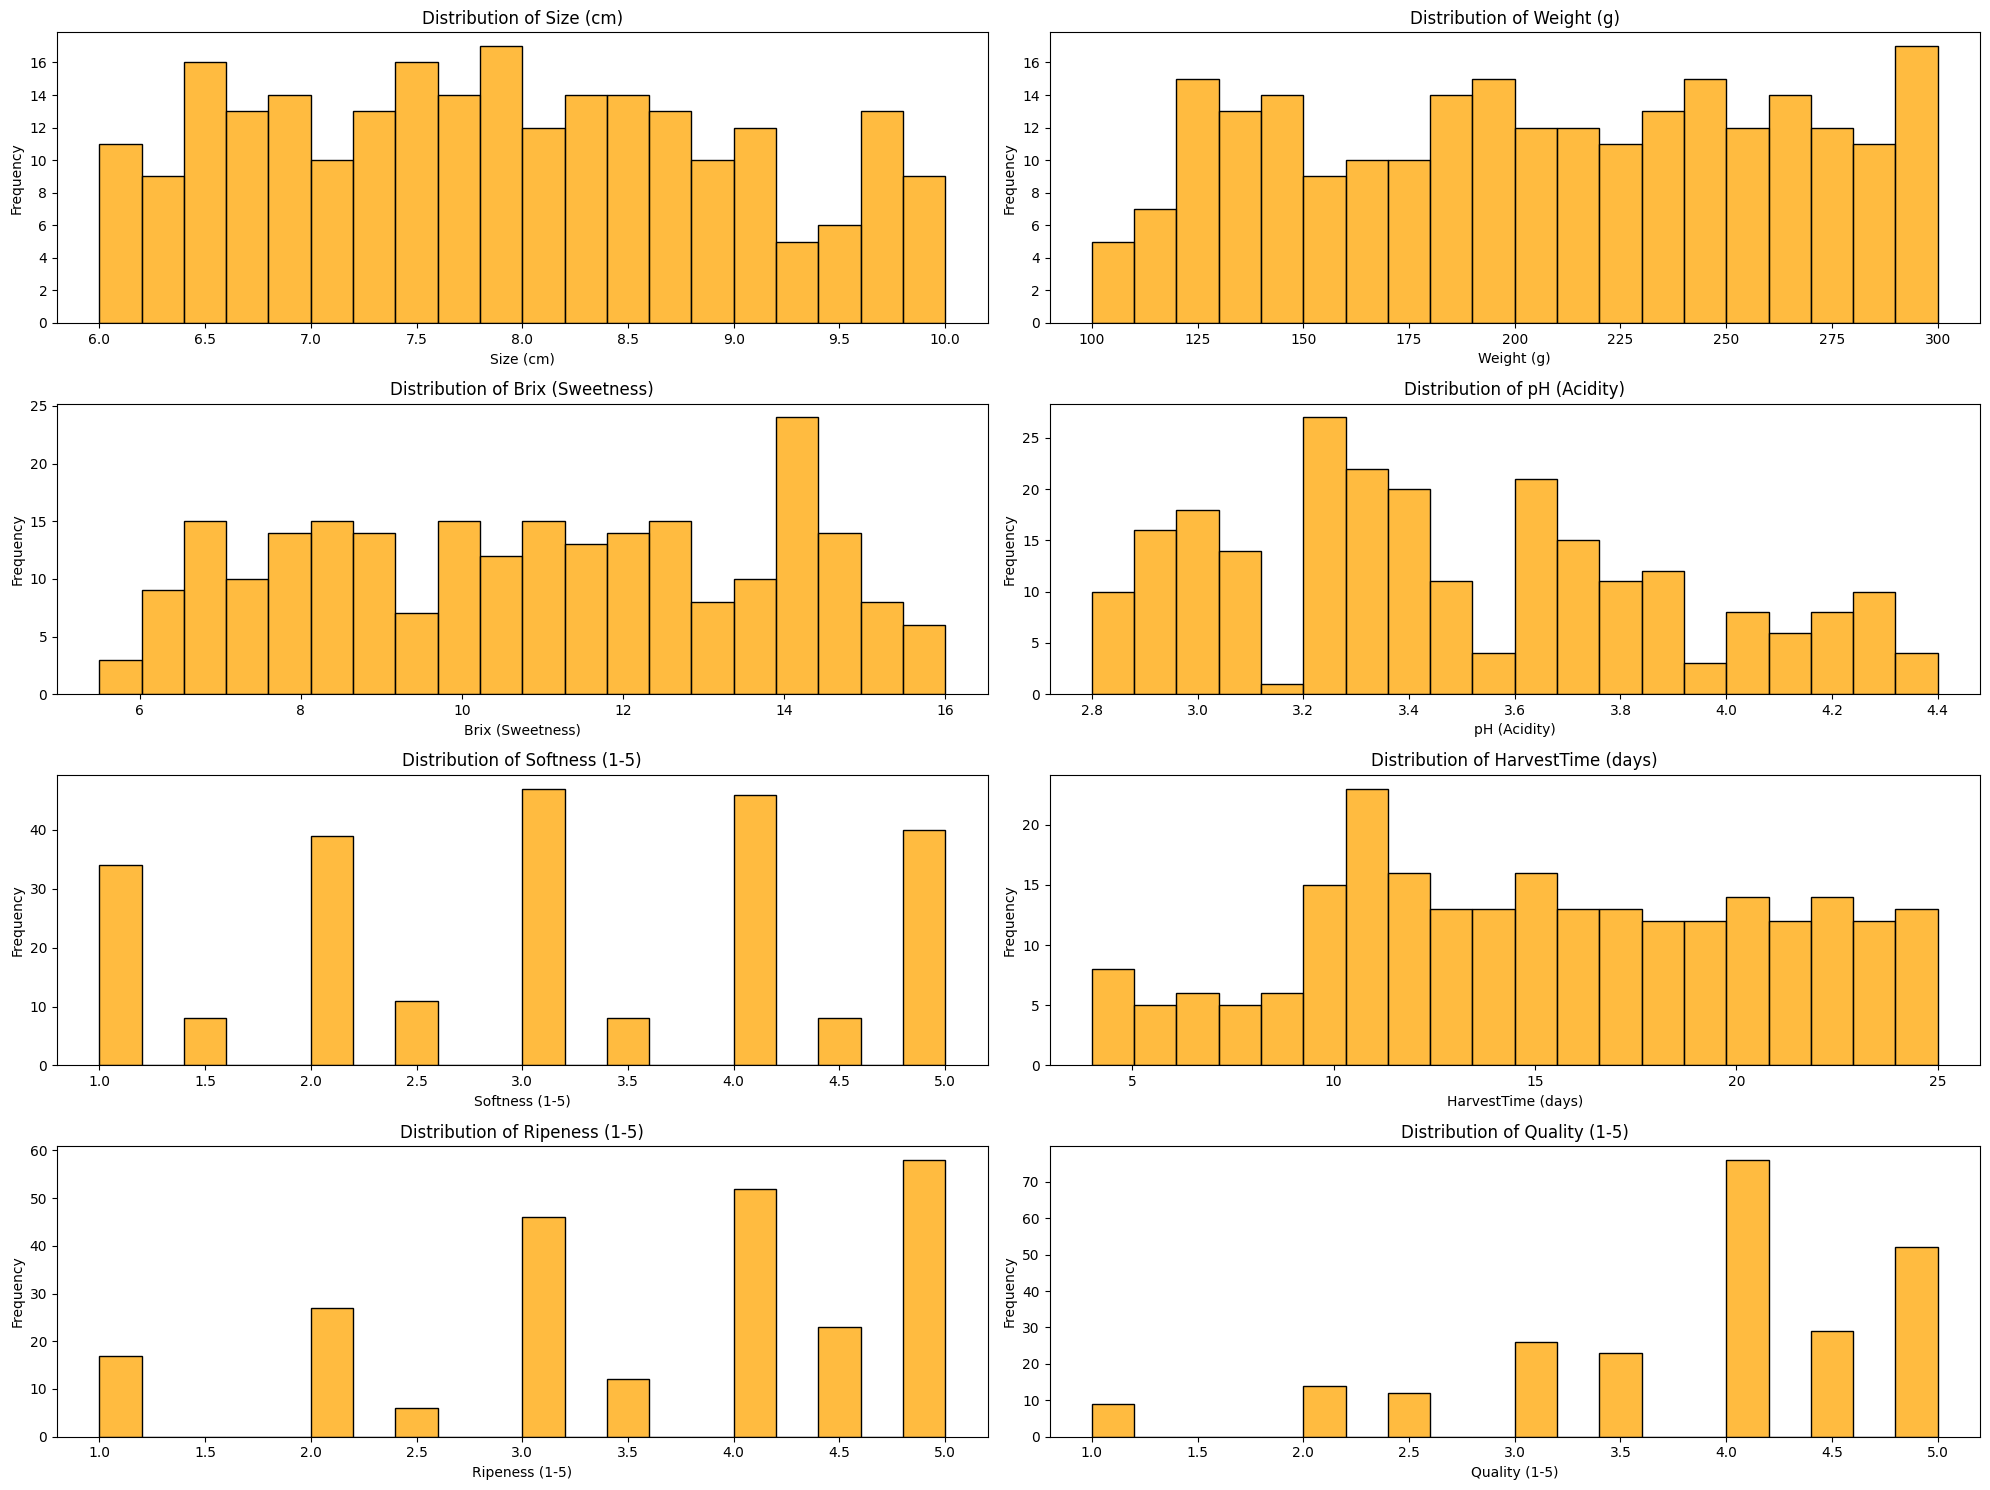

In [ ]:
# List of columns for which you want to create histograms
columns_eda = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']

# Set up the matplotlib figure and adjust the size of the figure
plt.figure(figsize=(20, 15))

# Loop through the columns and create a subplot for each histogram
for i, column in enumerate(columns_eda, 1):
    plt.subplot(4, 2, i)  # Adjust the grid dimensions accordingly
    sns.histplot(data_encoded[column], color="Orange", bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust the layout so that subplots do not overlap
plt.tight_layout()

# Show the plot
plt.show()

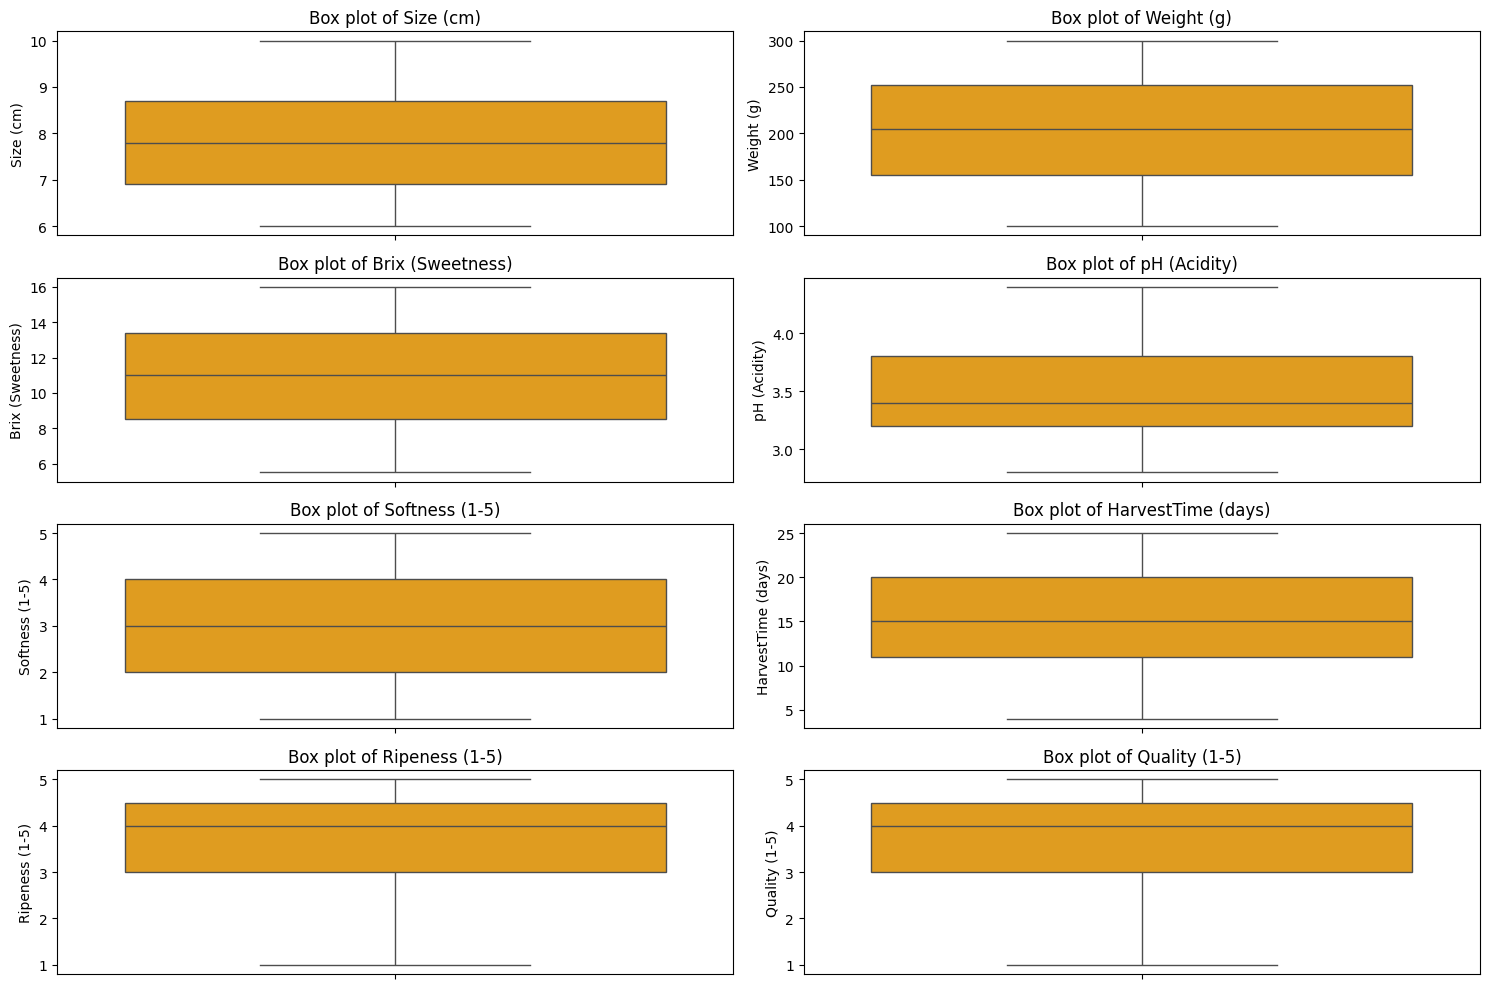

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and create a box plot for each
for i, column in enumerate(columns_eda):
    plt.subplot(4, 2, i+1)  # This creates a 4x2 grid
    sns.boxplot(y=data_encoded[column],color="Orange")
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

## **5. Oversampling**

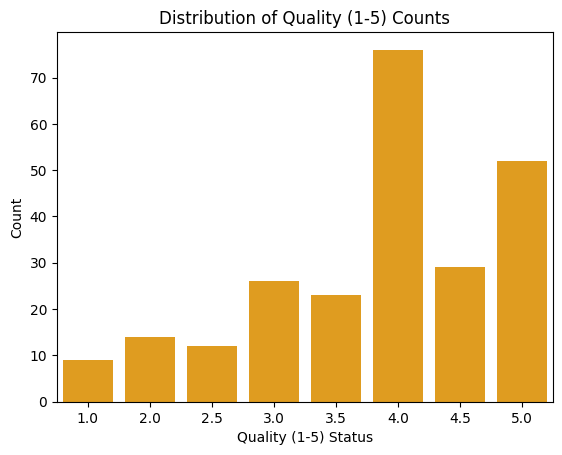

Count of each unique value in 'counts':
Quality (1-5)
4.0    76
5.0    52
4.5    29
3.0    26
3.5    23
2.0    14
2.5    12
1.0     9
Name: count, dtype: int64


In [ ]:
# Distribution Target Feature (Quality (1-5))

sns.countplot(x='Quality (1-5)', data=data_encoded, color="Orange")
plt.title('Distribution of Quality (1-5) Counts')
plt.xlabel('Quality (1-5) Status')
plt.ylabel('Count')
plt.show()

counts = data_encoded['Quality (1-5)'].value_counts()

print("Count of each unique value in 'counts':")
print(counts)

The visualisation results show that there is an imbalance of data in the class/target attribute, which will have an impact on the performance of the model that only focuses on the majority class, hence the need to apply oversampling techniques. This technique was chosen because the existing dataset has a relatively small amount and oversampling is also considered better than the undersampling technique.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Defining feature set (X) and target (y)
X = data_encoded.drop('Quality (1-5)', axis=1)
y = data_encoded['Quality (1-5)']

In [ ]:
# Defining feature set (X) and Quality (1-5) (y)
X = data_encoded.drop('Quality (1-5)', axis=1)
y = data_encoded['Quality (1-5)']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Oversampling the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Recombine features and labels that have been oversampled into a new dataframe
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Quality (1-5)'] = y_resampled

# The result of data_resampled is a dataset with a balanced number of classes
print(data_resampled.head()) # Displays some data from the resampling results

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

`ValueError: Unknown label type: 'continuous'`, indicates that the target column (`y`) used is considered a continuous variable (e.g. a numeric column with no clear explicit classification, such as a floating number or an expanding integer). Random Oversampling is a technique intended for use with classification targets (i.e. categories), not continuous or regression data. **Therefore, it is necessary to adjust the data type to a categorical class.**

In [ ]:
# Convert the Quality column (1-5) to integer type first if necessary
data_encoded['Quality (1-5)'] = data_encoded['Quality (1-5)'].astype(int)

# Then convert to 'category' type
data_encoded['Quality (1-5)'] = data_encoded['Quality (1-5)'].astype('category')

# Check data type after conversion
print(data_encoded['Quality (1-5)'].dtype)

In [ ]:
# Redefine X and y after data type conversion
X = data_encoded.drop('Quality (1-5)', axis=1)
y = data_encoded['Quality (1-5)']

# Initialize and apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Recombine features and labels that have been oversampled into a new dataframe
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Quality (1-5)'] = y_resampled

data_resampled

In [ ]:
counts = data_resampled['Quality (1-5)'].value_counts()

print("Count of each unique value in 'counts':")
print(counts)

In [ ]:
# Plotting distribusi kelas sebelum dan sesudah oversampling
plt.figure(figsize=(12, 4))

# Plot sebelum oversampling
plt.subplot(1, 2, 1)
new_df1 = pd.DataFrame(data=y)
new_df1['Quality (1-5)'].value_counts().plot(kind='bar', figsize=(10,5), color="Orange")
plt.title("Class before oversampling")
plt.xticks(rotation=0)

# Plot setelah oversampling
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_resampled)
new_df2['Quality (1-5)'].value_counts().plot(kind='bar', figsize=(10,5), color="Orange")
plt.title("Class after oversampling with RandomOverSampler")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## **6. Normalization & Splitting**

In [ ]:
X = data_resampled.drop(columns=['Quality (1-5)'])
y = data_resampled['Quality (1-5)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split Data Test and Train
X = X
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **7. Modelling & Evaluation**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### **7.1 Adaboost Classifier**

In [ ]:
# Initiation and Training the Model Adaboost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make Prediction with Adaboost Classifier
y_pred_adaboost = adaboost_model.predict(X_test)

In [ ]:
# Evaluation Model Adaboost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

print("Adaboost Classifier:")
print("Akurasi:", accuracy_adaboost)
print("Presisi:", precision_adaboost)
print("Recall:", recall_adaboost)
print("F1 Score:", f1_adaboost)
print()

In [ ]:
# Confusion Matrix - Adaboost Classifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Heatmap plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, cmap='Oranges', fmt='g',
            xticklabels=range(1, conf_matrix_adaboost.shape[1] + 1),
            yticklabels=range(1, conf_matrix_adaboost.shape[0] + 1)
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.show()

### **7.2 Gradient Boosting Classifier**

In [ ]:
# Initiation and Training the Model Gradient Boosting Classifier
gradientboost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradientboost_model.fit(X_train, y_train)

# Make Prediction with Gradient Boosting Classifier
y_pred_gradientboost = gradientboost_model.predict(X_test)

In [ ]:
# Evaluation Model Gradient Boosting
accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
precision_gradientboost = precision_score(y_test, y_pred_gradientboost, average='weighted')
recall_gradientboost = recall_score(y_test, y_pred_gradientboost, average='weighted')
f1_gradientboost = f1_score(y_test, y_pred_gradientboost, average='weighted')

print("Gradient Boosting Classifier:")
print("Akurasi:", accuracy_gradientboost)
print("Presisi:", precision_gradientboost)
print("Recall:", recall_gradientboost)
print("F1 Score:", f1_gradientboost)
print()

In [ ]:
# Confusion Matrix - Gradient Boosting Classifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix_gradientboost = confusion_matrix(y_test, y_pred_gradientboost)

# Heatmap plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gradientboost, annot=True, cmap='Oranges', fmt='g',
            xticklabels=range(1, conf_matrix_gradientboost.shape[1] + 1),
            yticklabels=range(1, conf_matrix_gradientboost.shape[0] + 1)
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

### **7.3 Light GBM Classifier**

In [ ]:
# Initiation and Training the Model LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Make Prediction with Model LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)

In [ ]:
# Evaluation Model LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')

print("LightGBM Classifier:")
print("Akurasi:", accuracy_lgbm)
print("Presisi:", precision_lgbm)
print("Recall:", recall_lgbm)
print("F1 Score:", f1_lgbm)
print()

In [ ]:
# Confusion Matrix - Light GBM Classifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Heatmap plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, cmap='Oranges', fmt='g',
            xticklabels=range(1, conf_matrix_lgbm.shape[1] + 1),
            yticklabels=range(1, conf_matrix_lgbm.shape[0] + 1)
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Ligh GBM Classifier')
plt.show()

### **7.4 CatBoost Classifier**

In [ ]:
# Initiation and Training the Model CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Make Prediction wiht Model CatBoost
y_pred_catboost = catboost_model.predict(X_test)

In [ ]:
# Evaluation Model CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost, average='weighted')
recall_catboost = recall_score(y_test, y_pred_catboost, average='weighted')
f1_catboost = f1_score(y_test, y_pred_catboost, average='weighted')

print("CatBoost Classifier:")
print("Akurasi:", accuracy_catboost)
print("Presisi:", precision_catboost)
print("Recall:", recall_catboost)
print("F1 Score:", f1_catboost)

In [ ]:
# Confusion Matrix - CatBoost Classifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Heatmap plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, cmap='Oranges', fmt='g',
            xticklabels=range(1, conf_matrix_catboost.shape[1] + 1),
            yticklabels=range(1, conf_matrix_catboost.shape[0] + 1)
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

### **7.5 XGBoost Classifier**

In [ ]:
# Initiation and Training the Model XGBoost Classifier
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

# Make Prediction with XGBoost Classifier
y_pred = xgboost.predict(X_test)

A ValueError was found when implementing the XGBoost algorithm. This happens because there are Invalid Classes that expect the Target Class to start from 0 (Zero), while in the data that used the Target Class starts from 1 (One). If the data is changed starting from 0 (Zero) to implement XGBoost, there will be a label difference with the data that used in other algorithms.